In [27]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn

from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch import optim
from torch.autograd import Variable

import matplotlib.pyplot as plt

In [2]:
# check available device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [4]:
# download MNIST dataset

train_data = datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5064931.28it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 137160.42it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1267692.51it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4065413.74it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



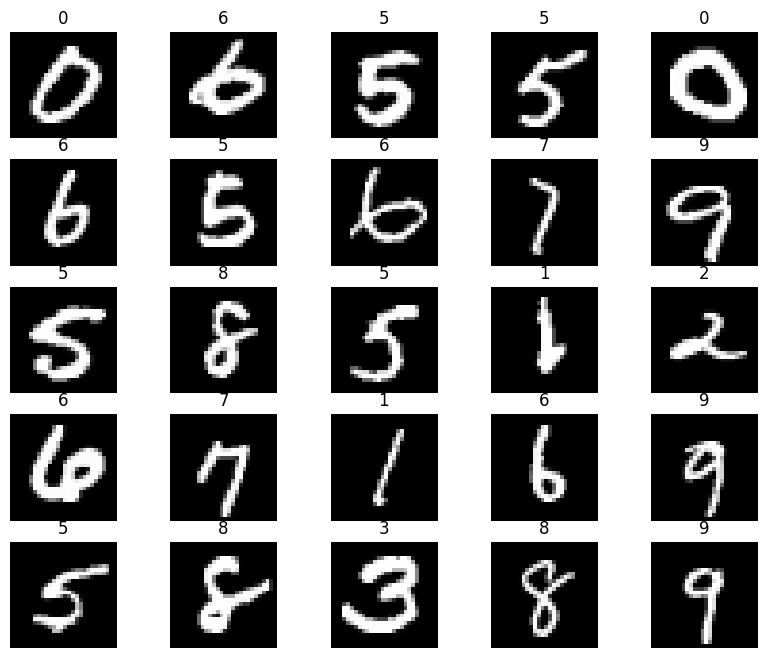

In [9]:
# Visualization of MNIST dataset
'''plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' %train_data.targets[0])
plt.show()'''

figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(train_data), size=(1,)).item()
  img, label = train_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [24]:
# hyper-parameters
learning_rate = 1e-3
batch_size = 1000
epochs = 20
num_classes = 10

In [16]:
# Preparing data for training with DataLoaders
loaders = {
    'train': DataLoader(train_data,
                        batch_size=batch_size,
                        shuffle=True,
                        num_workers=1),
    'test': DataLoader(test_data,
                      batch_size=batch_size,
                      shuffle=True,
                      num_workers=1)
}

In [44]:
# Define the CNN model

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    self.conv1 = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3), nn.ReLU())
    self.conv2 = nn.Sequential(nn.Conv2d(16, 32, kernel_size=3), nn.ReLU(), nn.MaxPool2d(kernel_size = 2))
    self.conv3 = nn.Sequential(nn.Conv2d(32, 64, kernel_size=3), nn.ReLU(), nn.MaxPool2d(kernel_size = 2))
    self.dropout = nn.Dropout(0.25)
    self.fc1 = nn.Linear(64*5*5, 128)
    self.fc2 = nn.Linear(128, num_classes)

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)
    x = self.dropout(x)
    x = x.view(x.size(0), -1)
    x = self.fc1(x)
    x = self.dropout(x)
    out = self.fc2(x)
    return out


In [45]:
model = CNN().to(device)
print(model)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (dropout): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=1600, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [46]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [51]:
# Train the model

def train(epoch, md, loader):
  md.train()
  total_step = len(loader['train'])

  for e in range(epoch):
    avg_cost = 0
    for i, (images, labels) in enumerate(loader['train']):
      images, labels = images.cuda(), labels.cuda()

      output = md(images)
      loss = criterion(output, labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      avg_cost += loss / total_step

    print('[Epoch: {:>4}] cost = {:>.9}'.format(e + 1, avg_cost))

train(epochs, model, loaders)

[Epoch:    1] cost = 0.0115532605
[Epoch:    2] cost = 0.0120916702
[Epoch:    3] cost = 0.011562462
[Epoch:    4] cost = 0.0106475735
[Epoch:    5] cost = 0.0108962506
[Epoch:    6] cost = 0.0101267062
[Epoch:    7] cost = 0.00900772121
[Epoch:    8] cost = 0.00930958893
[Epoch:    9] cost = 0.00985814724
[Epoch:   10] cost = 0.0105462335
[Epoch:   11] cost = 0.00947467424
[Epoch:   12] cost = 0.00849742722
[Epoch:   13] cost = 0.00838734116
[Epoch:   14] cost = 0.00869707949
[Epoch:   15] cost = 0.00762351882
[Epoch:   16] cost = 0.0073245191
[Epoch:   17] cost = 0.00835655909
[Epoch:   18] cost = 0.00730782794
[Epoch:   19] cost = 0.00755685521
[Epoch:   20] cost = 0.00869918149


In [53]:
# Test model and Check accuracy
def test():
  model.eval()
  with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in loaders['test']:
      images, labels = images.cuda(), labels.cuda()
      output = model(images)
      preds = torch.max(output.data, 1)[1]
      total += len(labels)
      correct += (preds == labels).sum().item()
    print('Test Accuracy: ', 100.*correct/total)

test()

Test Accuracy:  99.31
